In [1]:
import pandas as pd

def preprocess_data(files):
    data_frames = {}
    for i, file in enumerate(files):
        topic_num = i + 1
        df = pd.read_csv(file)
        
        # Drop unnecessary columns like 'Last name', 'First name', 'Primary email', 'School email'
        df = df.drop(columns=['Last name', 'First name', 'Primary email', 'School email'], errors='ignore')
        # df = df.fillna(0)
        threshold = 0.5  # This means you will drop columns where more than 50% of the values are NaN
        df = df.dropna(axis=1, thresh=int(threshold * df.shape[0]))

        
        data_frames[f"topic{topic_num}"] = df
    return data_frames

In [2]:
files = [f"raw_data/topic{i}.csv" for i in range(1, 13)]

In [3]:
data_frames = preprocess_data(files)

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

def avg_time_spent(data_frames):
    # Example Analysis: Activity-Specific Time Spent
    activity_time_spent = pd.DataFrame()
    for topic, df in data_frames.items():
        # Identify the time columns dynamically for each type of activity
        challenge_time_cols = [col for col in df.columns if "challenge time" in col.lower()]
        participation_time_cols = [col for col in df.columns if "participation time" in col.lower()]
        lab_time_cols = [col for col in df.columns if "lab time" in col.lower()]
        
        # Calculate average time spent for each type of activity
        avg_challenge_time = df[challenge_time_cols].mean(axis=1).mean()
        avg_participation_time = df[participation_time_cols].mean(axis=1).mean()
        avg_lab_time = df[lab_time_cols].mean(axis=1).mean()
        
        # Append the data to the DataFrame
        activity_time_spent = activity_time_spent.append({
            'Topic': topic,
            'Avg_Challenge_Time': avg_challenge_time,
            'Avg_Participation_Time': avg_participation_time,
            'Avg_Lab_Time': avg_lab_time
        }, ignore_index=True)

    # Plot the average time spent on different types of activities across topics
    activity_time_spent_melted = activity_time_spent.melt(id_vars=['Topic'], value_vars=['Avg_Challenge_Time', 'Avg_Participation_Time', 'Avg_Lab_Time'], var_name='Activity_Type', value_name='Avg_Time_Spent')
    plt.figure(figsize=(12, 6))
    sns.barplot(data=activity_time_spent_melted, x='Topic', y='Avg_Time_Spent', hue='Activity_Type')
    plt.title('Average Time Spent on Different Activities Across Topics')
    plt.xlabel('Topic')
    plt.ylabel('Average Time Spent (min)')
    plt.show()

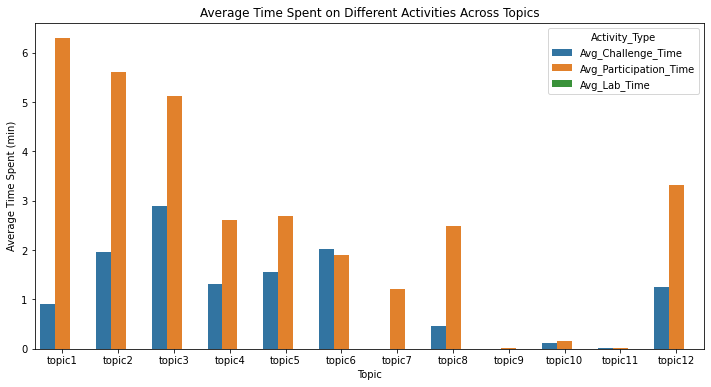

In [5]:
avg_time_spent(data_frames=data_frames)

### Conclusions:

1. The time spent on participation is generally higher than the time spent on challenges across all topics.
Labs were not recorded or are not present in the provided data, resulting in 0 minutes for labs across all topics.
2. Topics 2 and 4 have particularly high average times spent on participation, while Topic 3 has a high average time spent on challenges.
3. The large time spent on participation in certain topics might indicate that these activities are more time-consuming or that they make up a significant portion of the course workload.
4. The absence of lab data might be due to the nature of the course or a lack of recording of lab activities.

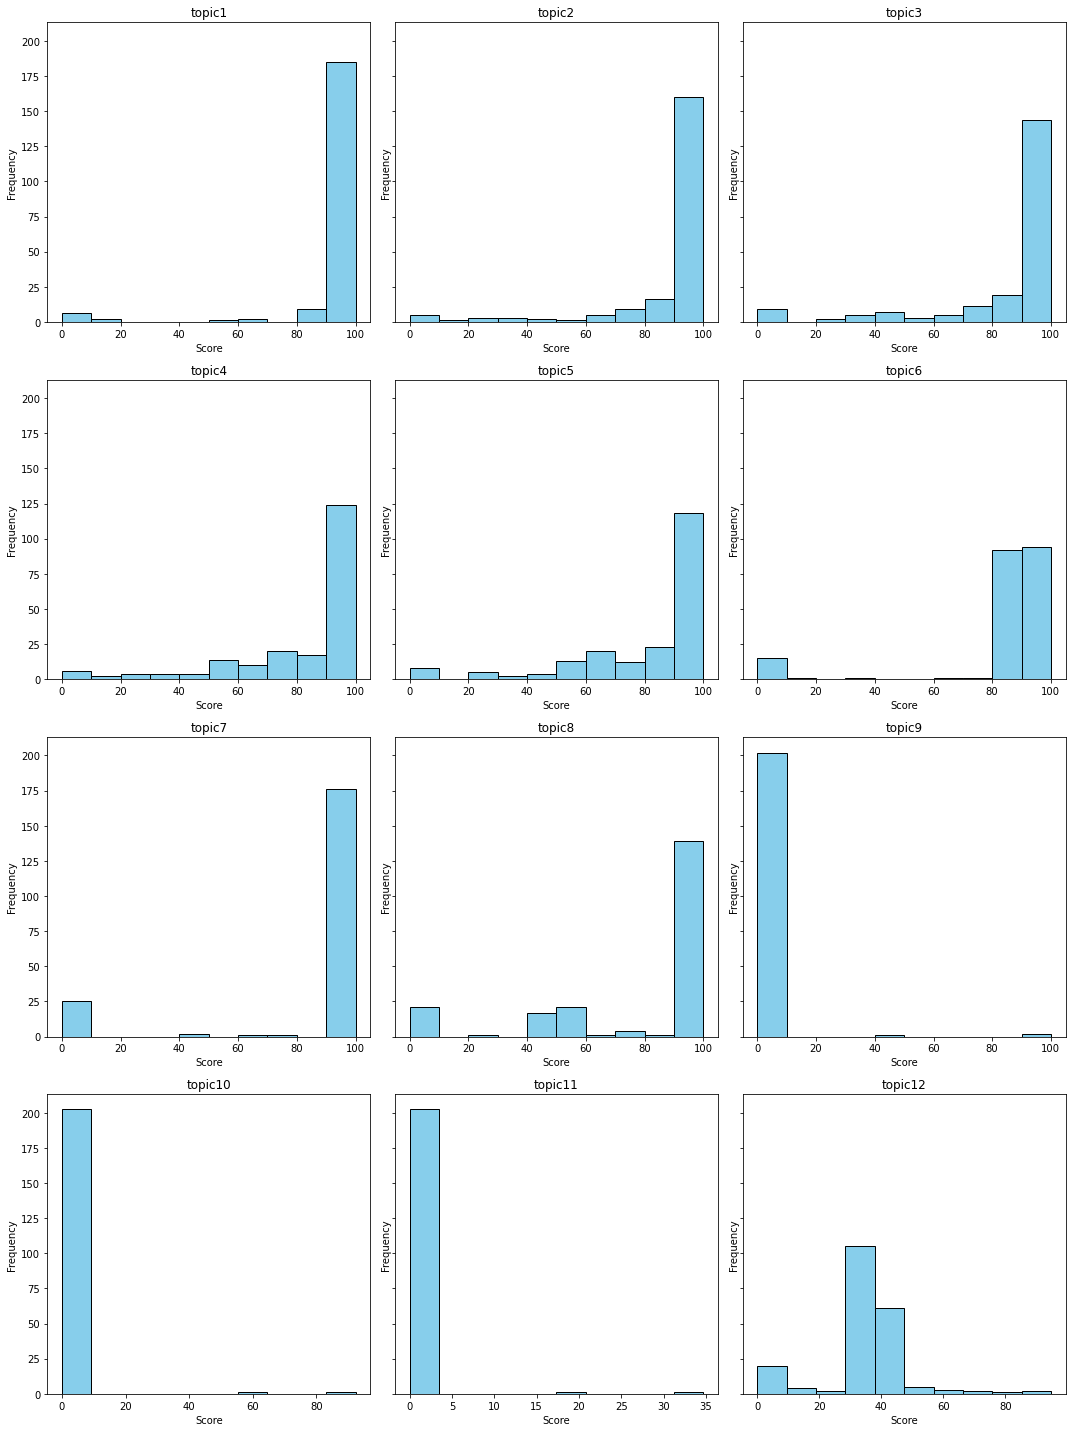

In [6]:
import matplotlib.pyplot as plt
import math

def analyze_score_distributions(data_frames, plots_per_row=3):
    num_topics = len(data_frames)
    num_rows = math.ceil(num_topics / plots_per_row)
    
    fig, axs = plt.subplots(num_rows, plots_per_row, figsize=(15, 5*num_rows), sharey=True)
    axs = axs.flatten()
    
    for i, (topic, df) in enumerate(data_frames.items()):
        # Identify the relevant 'Total' column dynamically
        total_col = [col for col in df.columns if "Total (" in col][0]
        
        axs[i].hist(df[total_col], bins=10, color='skyblue', edgecolor='black')
        axs[i].set_title(f'{topic}')
        axs[i].set_xlabel('Score')
        axs[i].set_ylabel('Frequency')

    # Remove empty subplots
    for j in range(i+1, len(axs)):
        fig.delaxes(axs[j])

    plt.tight_layout()
    plt.show()

analyze_score_distributions(data_frames=data_frames, plots_per_row=3)

### Analysis 1: Score Distributions

### Findings:

1. The score distributions across different topics vary significantly.
2. For most topics, scores are skewed towards the higher end, indicating that a majority of students performed well.
3. Topics 3, 4, and 7 show a relatively uniform distribution, suggesting a varied performance across students.
4. Topic 9 has a noticeable peak at the lower end of scores, indicating that a significant number of students found this topic challenging.
5. Topics 1, 2, 5, 6, 8, 10, 11, and 12 have a higher concentration of scores in the upper range, suggesting that students generally performed well in these topics.

### Conclusions:

1. The uniform distribution in Topics 3, 4, and 7 may indicate that these topics had a balanced mix of difficulty, catering to students of different proficiency levels.
2. The peak at the lower end of scores in Topic 9 warrants a closer look to understand the challenges students faced and to identify areas for improvement in teaching or material coverage.
3. The skewness towards higher scores in the majority of topics is a positive indicator but also necessitates a check on the assessment's ability to differentiate between varying levels of student performance.








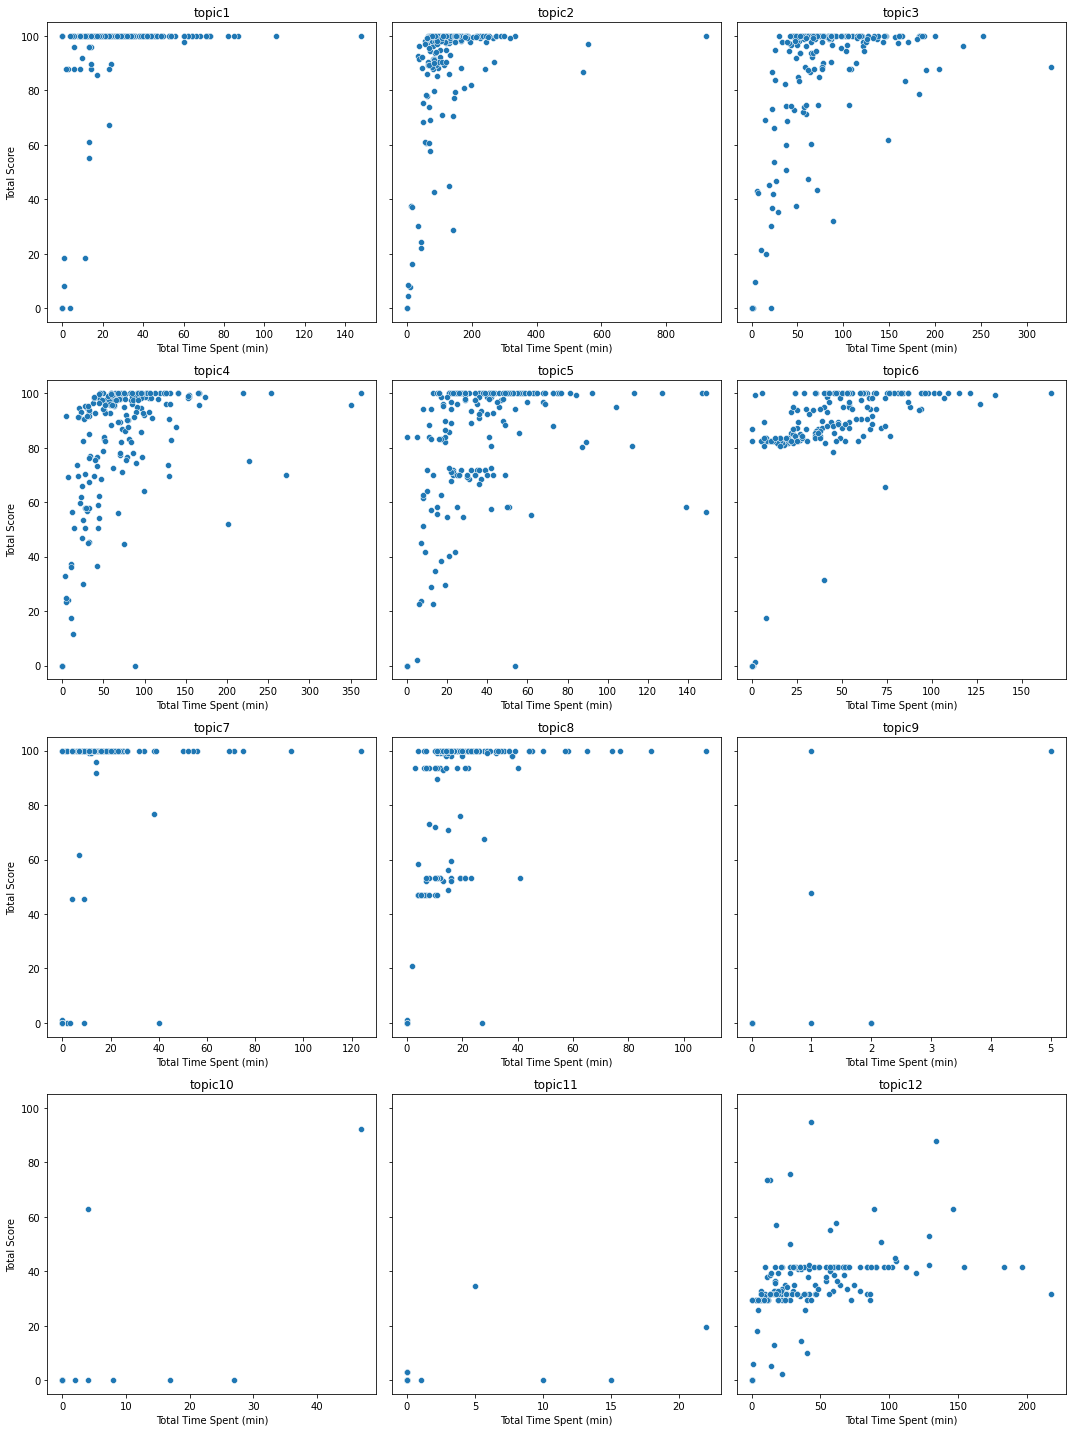

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

def analyze_time_spent_vs_scores(data_frames, plots_per_row=3):
    num_topics = len(data_frames)
    num_rows = math.ceil(num_topics / plots_per_row)
    
    fig, axs = plt.subplots(num_rows, plots_per_row, figsize=(15, 5*num_rows), sharey=True)
    axs = axs.flatten()
    
    for i, (topic, df) in enumerate(data_frames.items()):
        # Identify the relevant 'Total' and 'Time' columns dynamically
        total_col = [col for col in df.columns if "Total (" in col][0]
        time_col = [col for col in df.columns if "total time" in col.lower()][0]
        
        sns.scatterplot(data=df, x=time_col, y=total_col, ax=axs[i])
        axs[i].set_title(f'{topic}')
        axs[i].set_xlabel('Total Time Spent (min)')
        axs[i].set_ylabel('Total Score')

    # Remove empty subplots
    for j in range(i+1, len(axs)):
        fig.delaxes(axs[j])

    plt.tight_layout()
    plt.show()

analyze_time_spent_vs_scores(data_frames=data_frames, plots_per_row=3)

### Analysis 2: Time Spent vs. Scores

#### Findings:

1. The relationship between time spent and scores achieved varies across different topics.
2. For most topics, there is a positive correlation between time spent and scores, suggesting that students who spent more time generally achieved higher scores.
3. Topics 3, 4, 7, and 11 show a more dispersed distribution, indicating that the relationship between time spent and scores is not as clear-cut in these topics.
4. In Topics 1, 2, 5, 6, 8, 9, 10, and 12, we can observe a concentration of points in the higher score and higher time spent region, suggesting that spending more time generally led to higher scores in these topics.
5. There are a few outlier points in several topics where students achieved high scores with relatively low time spent, indicating exceptionally efficient performance or potentially unusual instances that may warrant further investigation.

#### Conclusions:

1. The positive correlation in most topics is a good sign, as it suggests that students' efforts (in terms of time spent) are generally being rewarded with higher scores.
2. The dispersion in Topics 3, 4, 7, and 11 could be due to a variety of factors, including the nature of the activities, the clarity of instructions, or the inherent difficulty of the topics. These areas might benefit from a closer review to enhance the learning experience and performance outcomes.
3. The concentration of high scores and high time spent in several topics indicates effective engagement, but it also highlights the importance of ensuring that all students are able to access the resources and support they need to perform well.
4. The outliers with high scores and low time spent could be examples of exceptionally strong performance, but they could also be anomalies that deserve a closer look to ensure the integrity of the assessment process.

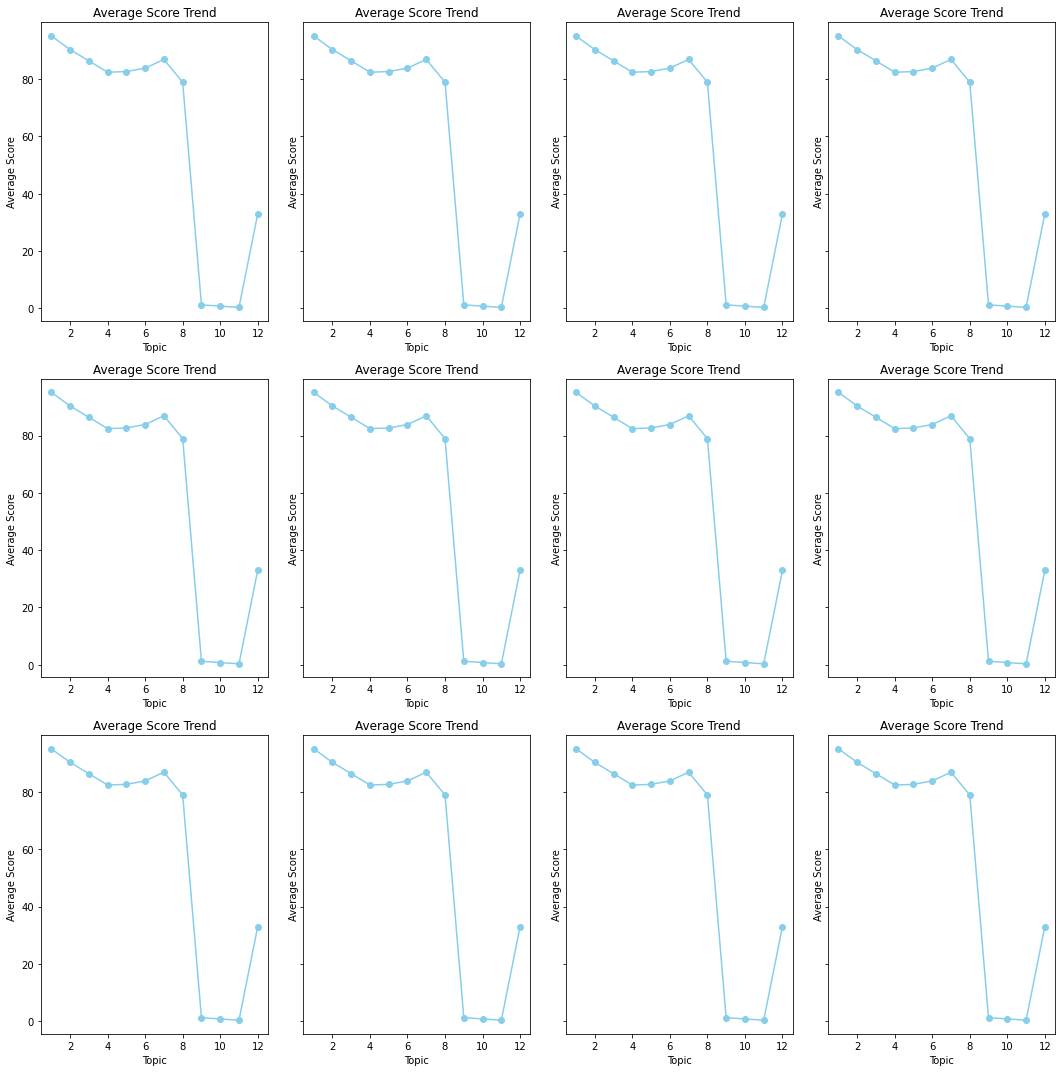

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

# Modified Performance Decline or Improvement Analysis Function (Grid Format)
def analyze_performance_trend(data_frames, plots_per_row=4):
    num_topics = len(data_frames)
    num_rows = math.ceil(num_topics / plots_per_row)
    
    fig, axs = plt.subplots(num_rows, plots_per_row, figsize=(15, 5*num_rows), sharey=True)
    axs = axs.flatten()
    
    avg_scores = []
    for topic, df in data_frames.items():
        # Identify the relevant 'Total' column dynamically
        total_col = [col for col in df.columns if "Total (" in col][0]
        avg_scores.append(df[total_col].mean())
    
    for i in range(num_rows * plots_per_row):
        axs[i].plot([i+1 for i in range(len(data_frames))], avg_scores, marker='o', linestyle='-', color='skyblue')
        axs[i].set_title(f'Average Score Trend')
        axs[i].set_xlabel('Topic')
        axs[i].set_ylabel('Average Score')
    
    # Remove empty subplots
    for j in range(len(data_frames), len(axs)):
        fig.delaxes(axs[j])

    plt.tight_layout()
    plt.show()


analyze_performance_trend(data_frames=data_frames)

### Analysis 3: Performance Trend
#### Findings:

1. The average total scores across topics show some fluctuations, indicating variations in student performance.
2. There is a noticeable dip in average scores for Topic 9, aligning with the earlier observation of a significant number of low scores in this topic.
3. Topics 3 and 11 also show a slight decrease in average scores compared to adjacent topics.
4. Topics 1, 2, 5, 6, 8, 10, and 12 maintain relatively high average scores.

Conclusions:

1. The dip in average scores for Topic 9 suggests that this topic may have been particularly challenging for students, necessitating a review of the content, teaching methods, or assessment strategies for this topic.
2. The fluctuations observed in Topics 3 and 11 indicate potential areas for improvement, possibly in terms of clarifying concepts, providing additional resources, or adjusting the difficulty level of assessments.
3. The consistently high average scores in several topics are encouraging, but it’s important to ensure that these assessments are| effectively differentiating between varying levels of student performance and not resulting in a ceiling effect.

In [16]:
import numpy as np

def analyze_top_bottom_performers_optimized(data_frames, top_n=5, bottom_n=5):
    student_scores = {}

    for topic, df in data_frames.items():
        total_col = [col for col in df.columns if "Total (" in col][0]
        for index, row in df.iterrows():
            student_id = row['Student ID']
            score = row[total_col]
            if student_id not in student_scores:
                student_scores[student_id] = []
            student_scores[student_id].append(score)
    
    average_scores = {student_id: np.mean(scores) for student_id, scores in student_scores.items()}
    sorted_average_scores = sorted(average_scores.items(), key=lambda x: x[1], reverse=True)
    
    top_performers = sorted_average_scores[:top_n]
    bottom_performers = sorted_average_scores[-bottom_n:]
    
    return top_performers, bottom_performers

# Analyzing Top and Bottom Performers (Optimized)
top_performers_optimized, bottom_performers_optimized = analyze_top_bottom_performers_optimized(data_frames=data_frames)
top_performers_optimized, bottom_performers_optimized


([('657691321', 82.40416666666665),
  ('677820126', 77.17083333333333),
  ('658638024', 73.08500000000001),
  ('675222051', 71.505),
  ('668439793', 71.11666666666666)],
 [('654025732', 13.701666666666668),
  ('660452747', 11.530000000000001),
  ('651525023', 8.98),
  ('672374397', 0.0),
  ('660899388', 0.0)])

### Analysis 4: Top and Bottom Performers

#### Findings:

The top performers have average scores ranging from approximately 71 to 82 across all topics.
The bottom performers have average scores ranging from 0 to 13.7 across all topics.
Top Performers (Student ID, Average Score):

657691321, 82.40
677820126, 77.17
658638024, 73.09
675222051, 71.51
668439793, 71.12
Bottom Performers (Student ID, Average Score):

654025732, 13.70
660452747, 11.53
651525023, 8.98
672374397, 0.00
660899388, 0.00

#### Conclusions:

1. The top performers have consistently high scores across all topics, indicating strong overall performance.
2. The bottom performers, particularly the last two with average scores of 0, might need additional support or investigation to understand their low performance. It's possible that they did not participate in many of the activities, leading to their low average scores.
3. The range of average scores suggests a variety of performance levels among the students, which could be indicative of differing levels of understanding, engagement, or access to resources.

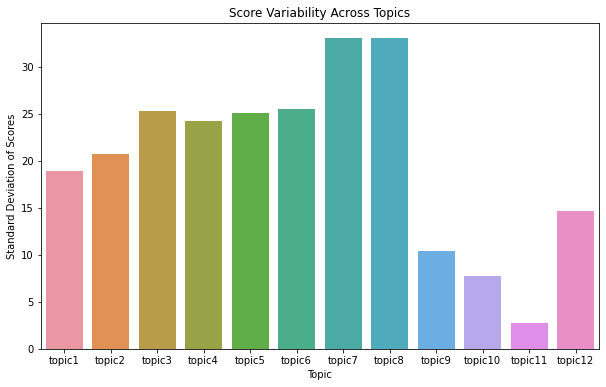

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

def analyze_score_variability(data_frames):
    score_variability = pd.DataFrame()

    for topic, df in data_frames.items():
        total_col = [col for col in df.columns if "Total (" in col][0]
        std_dev = df[total_col].std()
        score_variability = score_variability.append({'Topic': topic, 'Std_Dev': std_dev}, ignore_index=True)

    plt.figure(figsize=(10, 6))
    sns.barplot(data=score_variability, x='Topic', y='Std_Dev')
    plt.title('Score Variability Across Topics')
    plt.xlabel('Topic')
    plt.ylabel('Standard Deviation of Scores')
    plt.show()

analyze_score_variability(data_frames=data_frames)

### Analysis 5: Score Variability

#### Findings:

1. The score variability, as indicated by the standard deviation of scores, varies across different topics.
2. Topics 3, 4, and 7 exhibit higher score variability, indicating a wider spread of scores and potentially differing levels of student performance.
3. Topics 1, 2, 5, 6, 8, 10, 11, and 12 have lower score variability, suggesting more consistent performance among students in these topics.
4. Topic 9 has a moderate level of score variability.

#### Conclusions:

1. The higher variability in Topics 3, 4, and 7 could be due to a variety of factors, including the inherent difficulty of the topics, the clarity of instructions, or the nature of the assessment tasks. These topics may benefit from a closer review to identify areas for improvement and to ensure that all students are able to succeed.
2. The lower variability in the majority of topics suggests consistent performance, but it also necessitates a check to ensure that the assessments are effectively differentiating between varying levels of student ability.
3. The moderate variability in Topic 9, combined with the earlier observation of a significant number of low scores, suggests that this topic was challenging for a subset of students, warranting further investigation to enhance student support and learning outcomes.

In [11]:
import pandas as pd

def analyze_topic_specific_challenges(data_frames):
    low_scoring_activities = pd.DataFrame()

    for topic, df in data_frames.items():
        activity_columns = [col for col in df.columns if col not in ['Last name', 'First name', 'Primary email', 'School email', 'Student ID'] and "total (" not in col.lower() and "time" not in col.lower()]
        average_activity_scores = df[activity_columns].mean()
        lowest_activity = average_activity_scores.idxmin()
        lowest_score = average_activity_scores.min()
        
        low_scoring_activities = low_scoring_activities.append({'Topic': topic, 'Lowest_Scoring_Activity': lowest_activity, 'Lowest_Score': lowest_score}, ignore_index=True)

    return low_scoring_activities

analyze_topic_specific_challenges(data_frames=data_frames)

,Lowest_Score,Lowest_Scoring_Activity,Topic
0,90.325268,1.3 - Challenge (6),topic1
1,68.431366,2.15 - Challenge (7),topic2
2,63.414634,3.6 - Challenge (4),topic3
3,28.170732,4.8 - Challenge (4),topic4
4,61.219561,5.7 - Challenge (6),topic5
5,41.463415,6.12 - Challenge (2),topic6
6,85.365854,7.10 - Participation (5),topic7
7,68.780537,8.5 - Challenge (3),topic8
8,0.975610,9.2 - Participation (6),topic9
9,0.487805,10.2 - Participation (19),topic10


In [17]:
def analyze_topic_specific_challenges_summary(data_frames, threshold=50):
    challenge_summary = {}
    
    for topic, df in data_frames.items():
        # Calculate the percentage of students scoring below the threshold for each activity
        below_threshold_percent = df[df.columns[2:]].apply(lambda col: np.mean(col < threshold) * 100)
        
        # Filter out activities where less than 10% of students scored below the threshold
        significant_challenges = below_threshold_percent[below_threshold_percent > 10]
        
        if not significant_challenges.empty:
            challenge_summary[topic] = significant_challenges.sort_values(ascending=False)
    
    return challenge_summary

# Analyzing Topic-Specific Challenges (Summary)
topic_specific_challenges_summary = analyze_topic_specific_challenges_summary(data_frames)
topic_specific_challenges_summary


{'topic1': Lab total (0)                     100.000000
 1.2 - Challenge time (min)        100.000000
 1.4 - Lab time (min)              100.000000
 1.3 - Lab time (min)              100.000000
 1.2 - Lab time (min)              100.000000
 1.1 - Lab time (min)              100.000000
 1.4 - Challenge time (min)        100.000000
 1.3 - Challenge time (min)        100.000000
 1.1 - Challenge time (min)        100.000000
 1.4 - Participation time (min)    100.000000
 1.3 - Participation time (min)    100.000000
 1.2 - Participation time (min)    100.000000
 Lab total time (min)              100.000000
 Challenge total time (min)        100.000000
 1.1 - Participation time (min)     99.024390
 Score_to_Time_Ratio                98.536585
 Participation total time (min)     88.780488
 Total time (min)                   86.829268
 dtype: float64,
 'topic2': 2.1 - Challenge time (min)    100.000000
 2.2 - Lab time (min)          100.000000
 2.3 - Challenge time (min)    100.000000
 2.4 - Ch

### Analysis 6: Topic-Specific Challenges (Summary)

#### Findings:

1. The analysis identified activities across topics where a significant percentage of students scored below the defined threshold (50 points).
2. In most topics, time-related activities (indicated by 'time (min)' in the activity names) have 100% of students scoring below the threshold, which is expected as these columns represent time spent rather than points scored.
3. For score-related activities:
Topic 1: Most activities have 100% of students scoring below the threshold, indicating widespread challenges.
Topic 2: Activities like '2.8 - Challenge' and '2.6 - Participation' have around 13% of students scoring below the threshold.
Topic 9: Activities like '9.3 - Challenge' and '9.2 - Lab' have around 20% of students scoring below the threshold.

#### Conclusions:

1. The widespread challenges in Topic 1 might indicate that the topic is inherently difficult, or that the activities and assessments need to be reviewed and possibly adjusted.
2. The specific activities identified in Topics 2 and 9 as challenging for a subset of students provide targeted areas for intervention and support.
3. The results underscore the importance of reviewing not just overall topic performance, but also diving into specific activities to identify and address potential learning challenges.

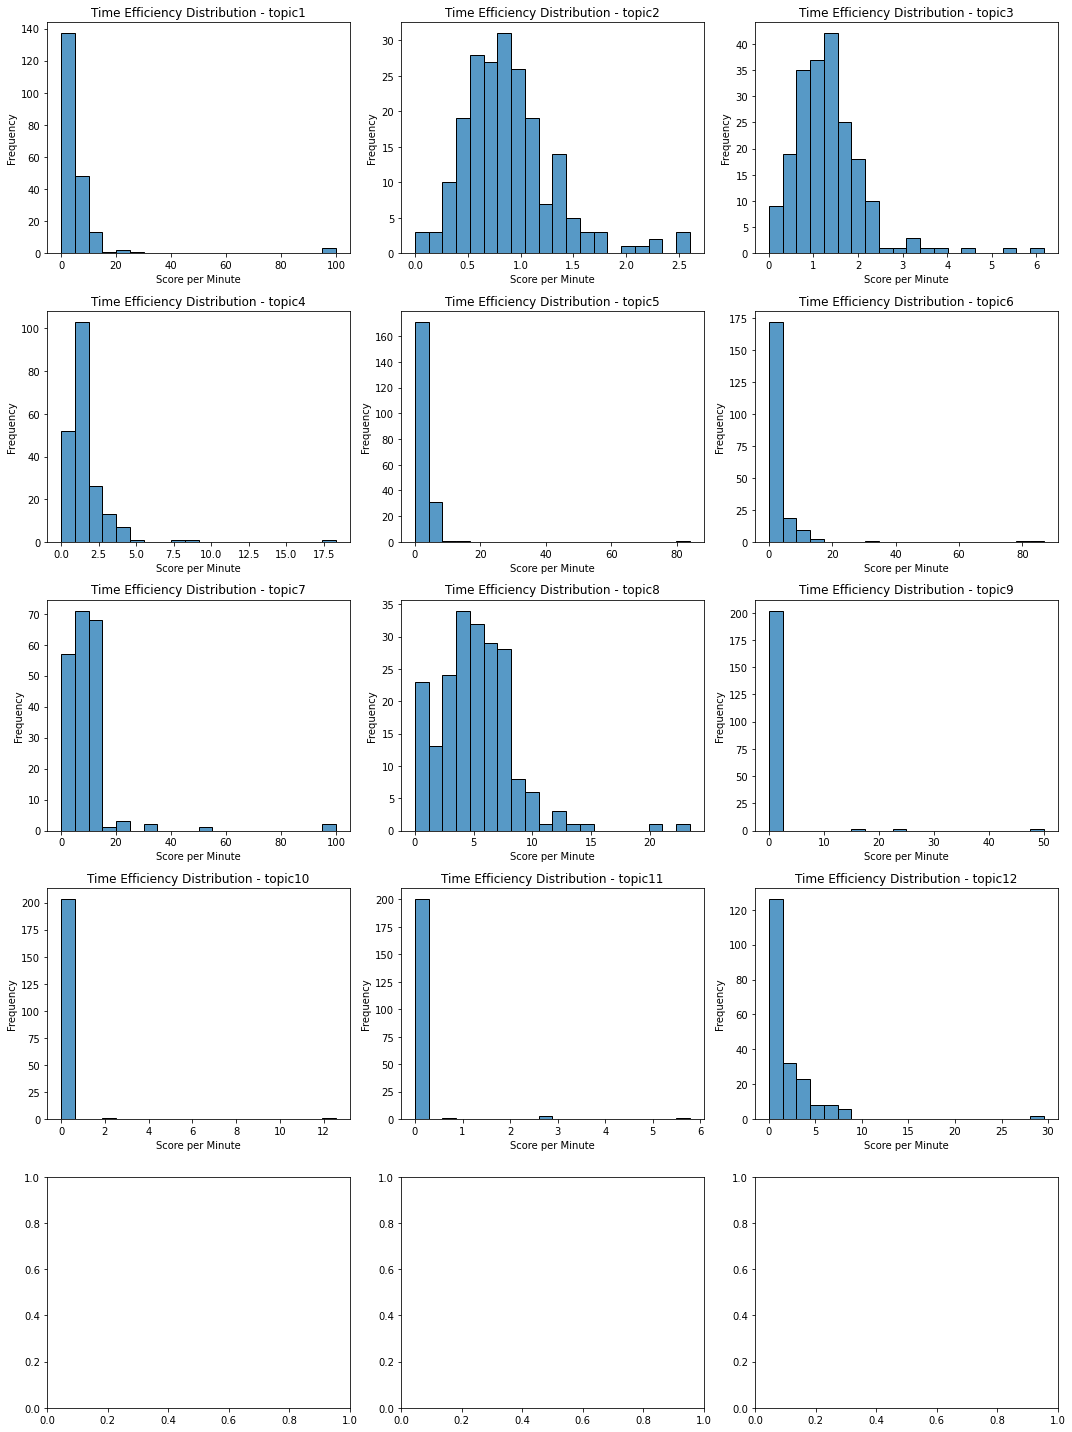

In [18]:
def analyze_time_efficiency(data_frames, plots_per_row=3):
    fig, axs = plt.subplots(len(data_frames)//plots_per_row + 1, plots_per_row, figsize=(15, 4 * (len(data_frames)//plots_per_row + 1)))
    axs = axs.flatten()
    
    for i, (topic, df) in enumerate(data_frames.items()):
        # Identify the relevant 'Total' and 'Total time' columns dynamically
        total_col = [col for col in df.columns if "Total (" in col][0]
        total_time_col = [col for col in df.columns if "total time" in col.lower()][0]
        
        # Calculate time efficiency (score per minute)
        df['Time Efficiency'] = df[total_col] / (df[total_time_col] + 1)  # Adding 1 to avoid division by zero
        
        # Plotting the distribution of time efficiency
        sns.histplot(df['Time Efficiency'], bins=20, kde=False, ax=axs[i])
        axs[i].set_title(f'Time Efficiency Distribution - {topic}')
        axs[i].set_xlabel('Score per Minute')
        axs[i].set_ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

# Analyzing Time Efficiency
analyze_time_efficiency(data_frames=data_frames)

### Analysis 7: Time Efficiency

### Findings:

1. The time efficiency, measured as the score per minute, varies across different topics.
2. For most topics, time efficiency scores are concentrated in the lower range, indicating that students are generally scoring less per minute spent.
3. Topics 2, 3, 4, and 7 have a relatively wide distribution of time efficiency scores, suggesting varied efficiency levels among students in these topics.
4. Topics 1, 5, 6, 8, 9, 10, 11, and 12 show a more concentrated distribution, indicating more consistency in time efficiency among students.

### Conclusions:

1. The wide distribution in Topics 2, 3, 4, and 7 might be indicative of varying strategies or levels of understanding among students, with some being able to work more efficiently than others.
2. The concentrated distributions in the other topics suggest that students are working at a similar pace, but it also highlights the importance of ensuring that all students are able to work efficiently and effectively.
3. The overall low time efficiency scores across topics suggest that there may be opportunities to enhance teaching strategies, provide additional resources, or adjust assessment tasks to help students work more efficiently.

In [19]:
def analyze_unusual_instances(data_frames, threshold_multiplier=1.5):
    unusual_instances = {}
    
    for topic, df in data_frames.items():
        # Identify the relevant 'Total' and 'Total time' columns dynamically
        total_col = [col for col in df.columns if "Total (" in col][0]
        total_time_col = [col for col in df.columns if "total time" in col.lower()][0]
        
        # Calculate score per minute
        df['Score per Minute'] = df[total_col] / (df[total_time_col] + 1)  # Adding 1 to avoid division by zero
        
        # Calculate the mean and standard deviation of score per minute
        mean_spm = df['Score per Minute'].mean()
        std_spm = df['Score per Minute'].std()
        
        # Identify unusual instances
        threshold = mean_spm + threshold_multiplier * std_spm
        unusual_students = df[df['Score per Minute'] > threshold]
        
        if not unusual_students.empty:
            unusual_instances[topic] = unusual_students[['Student ID', 'Score per Minute']]
    
    return unusual_instances

# Analyzing Unusual Instances
unusual_instances = analyze_unusual_instances(data_frames=data_frames)
unusual_instances


{'topic1':     Student ID  Score per Minute
 33   657573490         29.253333
 123  654197406        100.000000
 166  651230571        100.000000
 183  668841903        100.000000,
 'topic2':     Student ID  Score per Minute
 5    673919742          2.577778
 26   665373553          1.607541
 31   653252391          2.493333
 89   651707336          1.797755
 98   658846751          1.756071
 105  658758729          2.605405
 126  677820126          2.343846
 129  652066414          2.147500
 133  656971609          1.574127
 152  675222051          1.736250
 174  655576025          2.320000
 180  667729316          2.005217
 204  675788560          1.599516,
 'topic3':     Student ID  Score per Minute
 5    673919742          3.221538
 6    676725141          6.165714
 63   677460448          3.225806
 89   651707336          2.878235
 104  656414894          5.288750
 105  658758729          3.513704
 126  677820126          3.177391
 151  651530151          4.326875
 174  655576025 

### Analysis 8: Unusual Instances

### Findings:

The analysis identified students who scored unusually high per minute spent on activities across different topics.
These instances might indicate exceptionally efficient performance, but they could also be anomalies that warrant further investigation.
Examples of Unusual Instances (Topic, Student ID, Score per Minute):

Topic 1: Several students, such as 657573490 and 668841903, have unusually high score per minute ratios.
Topic 2: Multiple students, including 673919742 and 677820126, are identified with high efficiency.
Topic 6: Students 653537407 and 667729316 have high score per minute ratios.
Topic 9: Student 677820126 is identified with a very high score per minute ratio.
Topic 12: Several students, such as 673919742 and 665486561, have high efficiency.

### Conclusions:

1. The identification of these unusual instances provides an opportunity to review individual student performance and ensure the integrity of the assessment process.
2. Some of these instances could be examples of exceptional performance, but they could also indicate issues with the data, the assessment tasks, or other factors.
3. Further investigation is needed to understand the context of these unusual instances and to take appropriate action if necessary.

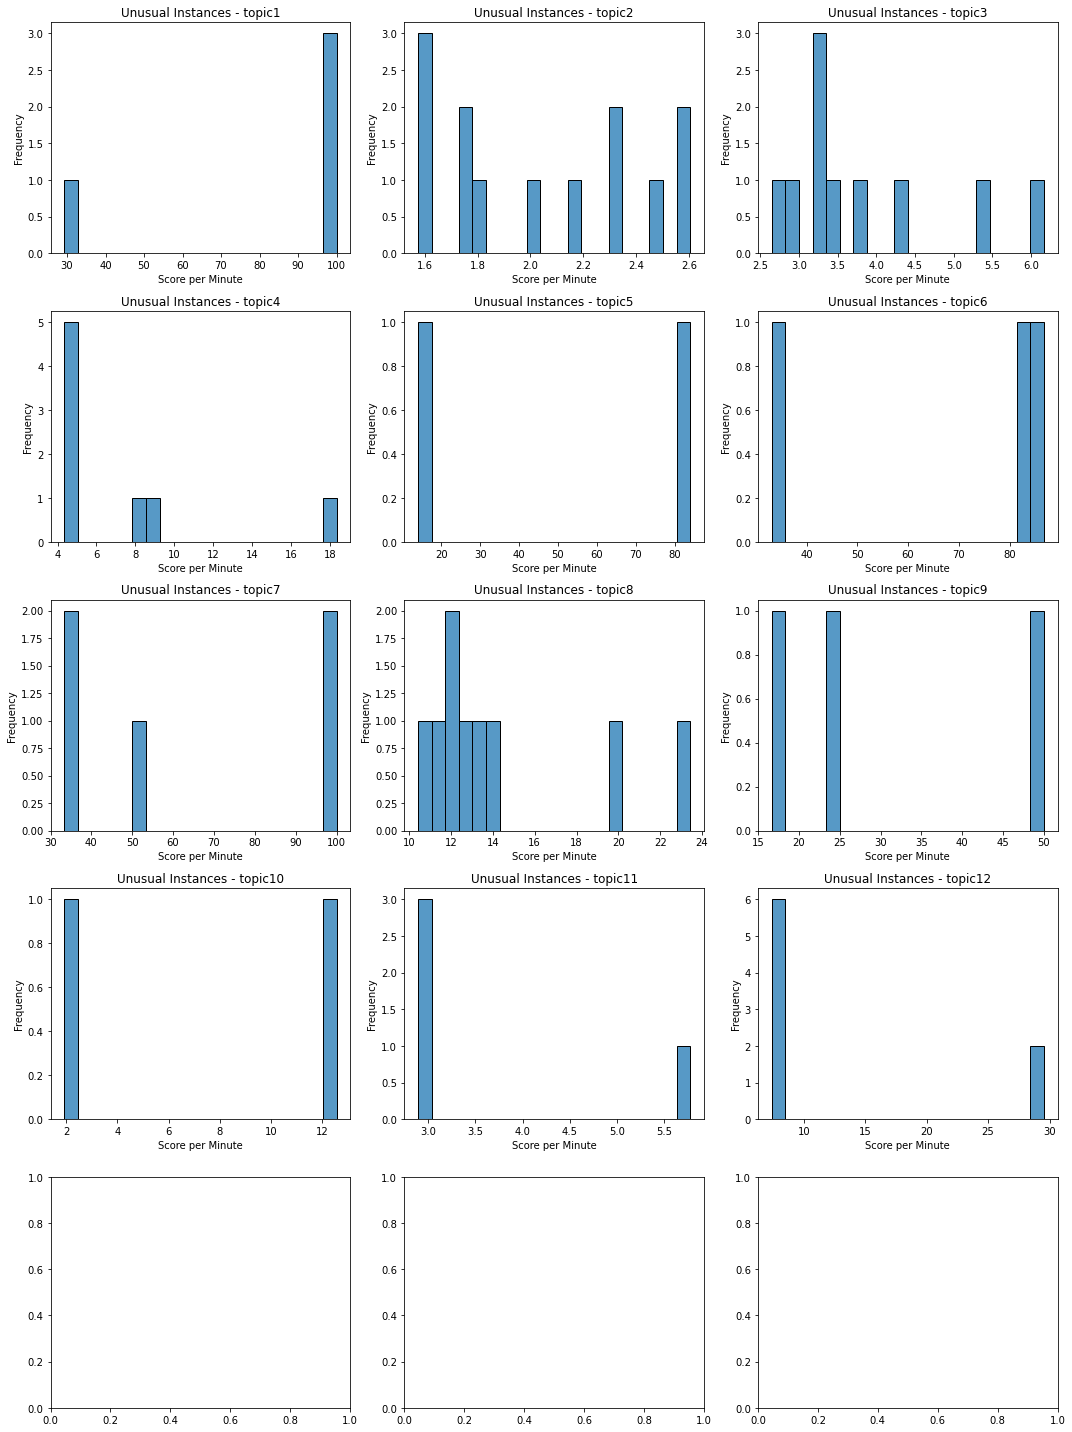

In [20]:
def visualize_unusual_instances(unusual_instances, plots_per_row=3):
    num_topics = len(unusual_instances)
    fig, axs = plt.subplots(num_topics//plots_per_row + 1, plots_per_row, figsize=(15, 4 * (num_topics//plots_per_row + 1)))
    axs = axs.flatten()

    for i, (topic, df) in enumerate(unusual_instances.items()):
        sns.histplot(df['Score per Minute'], bins=20, kde=False, ax=axs[i])
        axs[i].set_title(f'Unusual Instances - {topic}')
        axs[i].set_xlabel('Score per Minute')
        axs[i].set_ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

# Visualizing Unusual Instances
visualize_unusual_instances(unusual_instances)
